In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore

np.set_printoptions(legacy='1.13')

In [2]:
# loading the data
data = pd.read_csv('Datasets/data_salaries_india.csv')

In [3]:
data.head(2)

,Company Name,Job Title,Role,Salaries Reported,Location,Salary
0,Axis Bank,Data Scientist,Specialist,3,Bangalore,"₹11,71,687/yr"
1,Globex Digital Solutions,Machine Learning Engineer,Manager,1,Hyderabad,"₹32,57,305/yr"


In [4]:
def yearly_wage(row):
    # the last two characters determine if it's yearly, monthly, hourly
    period = row['Salary'][-2:]
    
    # remove all commas and combine all numbers
    number = int(''.join(filter(str.isdigit, row['Salary'])))
    
    # if it's hourly, the average work hours per year in India is
    # approximately 2117.01 (might change in future)
    if period == "hr":
        number = int(number * 2117.01)
    elif period == "mo":
        # months to year
        number = int(number * 12)
    
    # return the yearly salary in integer format
    return number


# I got "Yearly wage" function from Moodle to convert all.

data['Yearly Salary'] = data.apply(yearly_wage, axis=1)

# let's convert the "Year Salary" into "Month Salary" it is easier to understand
data['Monthly Salary'] = round( data['Yearly Salary'] / 12, 2)

# Now I can drop the the both columns  "Yearly Salary" and "Salary"
data = data.drop(['Yearly Salary', 'Salary'], axis=1)


data.head()

,Company Name,Job Title,Role,Salaries Reported,Location,Monthly Salary
0,Axis Bank,Data Scientist,Specialist,3,Bangalore,97640.58
1,Globex Digital Solutions,Machine Learning Engineer,Manager,1,Hyderabad,271442.08
2,Tempworks Services,Data Scientist,Manager,1,Bangalore,484267.08
3,BlueOptima,Machine Learning Engineer,Specialist,2,Bangalore,98413.75
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,50244.17


In [5]:
# What are the most common values in different fields (Job Titles, Companies, Location)?, Based on the distribution, is the data balanced or not?
data['Company Name'].value_counts().head()

Company Name
Tata Consultancy Services    51
Accenture                    39
Amazon                       35
Fresher                      31
First Student                30
Name: count, dtype: int64

In [6]:
data['Job Title'].value_counts().head()

Job Title
Data Scientist               2165
Data Analyst                 1167
Data Engineer                 948
Machine Learning Engineer     683
Data Science                   54
Name: count, dtype: int64

In [7]:
data['Location'].value_counts().head()

Location
Bangalore    1858
Pune          966
Hyderabad     786
New Delhi     781
Mumbai        736
Name: count, dtype: int64

## <span style="color: #20C997;">Personal Analysis</span>
The data is imbalanced 

In [8]:
# Combining "Machine Learning Data Associate" and "Machine Learning Associate"
data['Job Title'].value_counts()

Job Title
Data Scientist                              2165
Data Analyst                                1167
Data Engineer                                948
Machine Learning Engineer                    683
Data Science                                  54
Senior Data Scientist                         45
Junior Data Scientist                         22
Senior Machine Learning Engineer              10
Lead Data Scientist                            6
Software Engineer - Machine Learning           3
Machine Learning Data Associate II             2
Machine Learning Developer                     2
Data Scientist - Trainee                       2
Machine Learning Consultant                    2
Machine Learning Engineer/Data Scientist       2
Machine Learning Scientist                     2
Data Science Consultant                        1
Machine Learning Associate                     1
Machine Learning Data Associate                1
Machine Learning Software Engineer             1
Data Scien

In [9]:
# Combining "Machine Learning Engineer", "Senior Machine Learning Engineer", "Software Engineer - Machine Learning", "Machine Learning Developer", "Machine Learning Consultant", "Machine Learning Engineer/Data Scientist"
# "Machine Learning Associate Machine" "Learning Data Associate"  "Machine Learning Software Engineer", "Associate Machine Learning Engineer ", "Machine Learning Data Analyst", "Machine Learning Data Associate "

# Combining all the job titles that have 'Machine Learning' into one column
data['Job Title'] = data['Job Title'].apply(lambda x: "Machine Learning" if "Machine Learning" in x else x)
data['Job Title'].value_counts()

Job Title
Data Scientist              2165
Data Analyst                1167
Data Engineer                948
Machine Learning             712
Data Science                  54
Senior Data Scientist         45
Junior Data Scientist         22
Lead Data Scientist            6
Data Scientist - Trainee       2
Data Science Consultant        1
Data Science Manager           1
Data Science Lead              1
National Director              1
Data Science Associate         1
CEO                            1
Name: count, dtype: int64

### Ckeck out  any outliers in the data that might affect the averages negatively (certain salaries)?, ? Manage the outliers

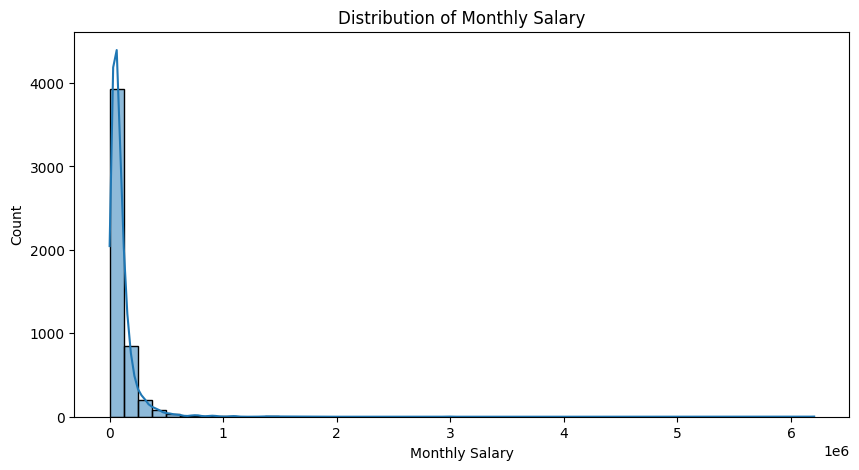

In [10]:
# Visualizing the distribution of the data
plt.figure(figsize=(10, 5))
sns.histplot(data['Monthly Salary'], bins=50, kde=True)
plt.title("Distribution of Monthly Salary")
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Before detecting the outliers of "Monthly Salary", the above visualization shows imbalanced distribution and the skewness is strong positive and the kurtosis is very high. it makes scenes because only few people have high income.

In [11]:
# Calculate statistics
mean = np.mean(data["Monthly Salary"])
median = np.median(data["Monthly Salary"])
std = np.std(data["Monthly Salary"])
min_val = np.min(data["Monthly Salary"])
max_val = np.max(data["Monthly Salary"])
percent = np.percentile(data["Monthly Salary"], [25, 50, 75])
skewness = stats.skew(data["Monthly Salary"])
kurtosis = stats.kurtosis(data["Monthly Salary"])


print("Mean Salary:", mean)
print("Median Salary:", median)
print("Minimum Salary:", min_val)
print("Maximum Salary:", max_val)
print("Standard Deviation of Salary:", std)
print("Salary Percentiles (25th, 50th, 75th):", percent)
print("Salary Skewness:", skewness)
print("Salary Kurtosis:", kurtosis)


Mean Salary: 102714.2045
Median Salary: 68664.25
Minimum Salary: 901.17
Maximum Salary: 6203777.25
Standard Deviation of Salary: 151359.556763
Salary Percentiles (25th, 50th, 75th): [  38581.415   68664.25   119661.75 ]
Salary Skewness: 16.3754260822
Salary Kurtosis: 552.180296604


## <span style="color: #20C997;">Personal Analysis</span>
As I mentioned on the above the "Monthly Salary" has un normal distribution, mean is higher than median which means mean is effected by some high income. 
Standard deviation is very spread.


In [12]:
Q1 = data["Monthly Salary"].quantile(0.25)
Q3 = data["Monthly Salary"].quantile(0.75)
IQR = Q3 - Q1


outliers_count = ((data["Monthly Salary"] < (Q1 - 1.5 * IQR)) | (data["Monthly Salary"] > (Q3 + 1.5 * IQR))).sum()
outliers = pd.DataFrame({'Salary': ['Outliers'], 'Count': [outliers_count]})
outliers

,Salary,Count
0,Outliers,374


### Trying different ways to handle the outliers values and then let's see what would be the best way to deal with them

In [13]:
# Using distribution (z-score) method to find and remove outliers
z_scores = zscore(data["Monthly Salary"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
z_scores_outlier = pd.DataFrame({'Salary': ['Outliers'], 'Count': [data.shape[0] - filtered_entries.sum()]})
z_scores_outlier

,Salary,Count
0,Outliers,59


## <span style="color: #20C997;">Personal Analysis</span>
Z-Score method is not  helpful to detect outliers" because my dataset is strongly skewed. since Z-Score measures how far data is from mean and standard Deviation unit but in this dataset mean and Standard deviation are effected by  outliers themselves. On other hand IQR is a mathematic technique to find the outliers and is independent from mean or Standard deviation. In my case IQR is the best option.

In [14]:
# Using cap method to deal with outliers
data['Monthly Salary'] = data['Monthly Salary'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)

# Calculate statistics
mean = np.mean(data["Monthly Salary"])
median = np.median(data["Monthly Salary"])
std = np.std(data["Monthly Salary"])
min_val = np.min(data["Monthly Salary"])
max_val = np.max(data["Monthly Salary"])
percent = np.percentile(data["Monthly Salary"], [25, 50, 75])
skewness = stats.skew(data["Monthly Salary"])
kurtosis = stats.kurtosis(data["Monthly Salary"])

print("Mean Salary:", mean)
print("Median Salary:", median)
print("Minimum Salary:", min_val)
print("Maximum Salary:", max_val)
print("Standard Deviation of Salary:", std)
print("Salary Percentiles (25th, 50th, 75th):", percent)
print("Salary Skewness:", skewness)
print("Salary Kurtosis:", kurtosis)

Mean Salary: 88093.8550293
Median Salary: 68664.25
Minimum Salary: 901.17
Maximum Salary: 241282.2525
Standard Deviation of Salary: 65627.7794208
Salary Percentiles (25th, 50th, 75th): [  38581.415   68664.25   119661.75 ]
Salary Skewness: 1.06197146454
Salary Kurtosis: 0.176469718204


## <span style="color: #20C997;">Personal Analysis</span>
After using the "Capping" method to deal with outliers data, Now mean salary got closed to the median but still higher than median. Skewness and kurtosis now show near to normal distribution. 
The gap between min and max is smaller. Standard deviation is lower. 


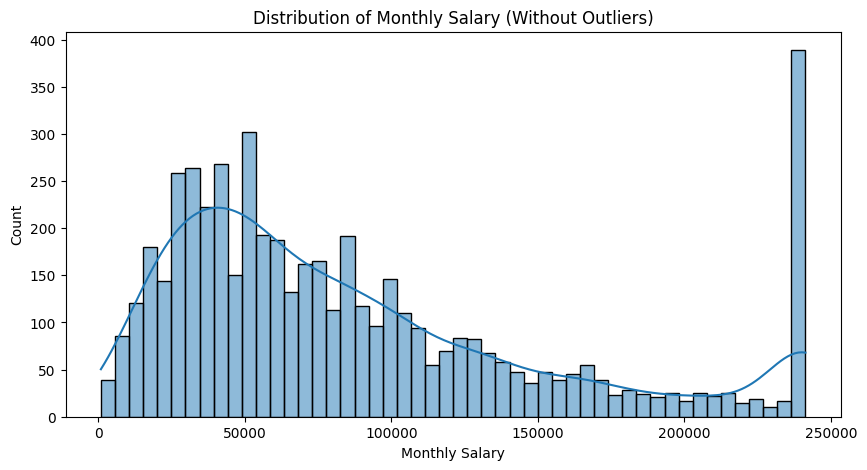

In [15]:
# Visualizing the distribution of "Monthly Salary" after removing outliers
plt.figure(figsize=(10, 5))
sns.histplot(data['Monthly Salary'], bins=50, kde=True)
plt.title("Distribution of Monthly Salary (Without Outliers)")
plt.show()

## <span style="color: #20C997;">Personal Analysis</span>
Even after handling outliers, still the data has skewed with long tail which means few people have higher income than others but it makes scence in real word
Now the distribution looks closer to normal 

In [16]:
data.head()

,Company Name,Job Title,Role,Salaries Reported,Location,Monthly Salary
0,Axis Bank,Data Scientist,Specialist,3,Bangalore,97640.5800
1,Globex Digital Solutions,Machine Learning,Manager,1,Hyderabad,241282.2525
2,Tempworks Services,Data Scientist,Manager,1,Bangalore,241282.2525
3,BlueOptima,Machine Learning,Specialist,2,Bangalore,98413.7500
4,Dell Technologies,Data Analyst,Specialist,5,New Delhi,50244.1700


### Checking out the correlation

In [17]:
data.dtypes

Company Name          object
Job Title             object
Role                  object
Salaries Reported      int64
Location              object
Monthly Salary       float64
dtype: object

In [18]:
# let's check number of unique values in each column
data.nunique()

Company Name         2523
Job Title              15
Role                    2
Salaries Reported      49
Location                5
Monthly Salary       3493
dtype: int64

In [19]:
# converting the "Role" into numerical values
one_hot = pd.get_dummies(data['Role'], prefix='Role').astype(int)
data = pd.concat([data, one_hot], axis=1)
# drop the original "Role" column
data = data.drop('Role', axis=1)
data.head()

,Company Name,Job Title,Salaries Reported,Location,Monthly Salary,Role_Manager,Role_Specialist
0,Axis Bank,Data Scientist,3,Bangalore,97640.5800,0,1
1,Globex Digital Solutions,Machine Learning,1,Hyderabad,241282.2525,1,0
2,Tempworks Services,Data Scientist,1,Bangalore,241282.2525,1,0
3,BlueOptima,Machine Learning,2,Bangalore,98413.7500,0,1
4,Dell Technologies,Data Analyst,5,New Delhi,50244.1700,0,1


## <span style="color: #20C997;">Personal Analysis</span>
I almost tried all options for encoding the categorical columns,but I have not seen any different so I go for dummy.

In [20]:
# Creating a dataframe for  Role_Manager,Role_Specialist, and monthly salary
role_data = data[['Role_Manager', 'Role_Specialist', 'Monthly Salary']]

In [21]:
# finding the correlation between the column data_role
correlation = role_data.corr()
correlation

,Role_Manager,Role_Specialist,Monthly Salary
Role_Manager,1.000000,-1.000000,0.517336
Role_Specialist,-1.000000,1.000000,-0.517336
Monthly Salary,0.517336,-0.517336,1.000000


In [22]:
role_data.corr(method="spearman")

,Role_Manager,Role_Specialist,Monthly Salary
Role_Manager,1.00000,-1.00000,0.42936
Role_Specialist,-1.00000,1.00000,-0.42936
Monthly Salary,0.42936,-0.42936,1.00000


## <span style="color: #20C997;">Personal Analysis</span>

I used both way and found out that Pearson gives me stronger correlation because of data distribution, it is skewed. So I go for Spearman

## <span style="color: #20C997;">Personal Analysis</span>
Role_Manager and Role_Specialist has perfectly negative correlated, since they are binary.
Manager is correlated with salary positive, it shows that manager has better salary than Specialist which is correlated negative with salary

In [24]:
# saving the clean data to a new csv file
data.to_csv('Datasets/data_cleaned.csv', index=False) 

In [25]:
# Let's find average salary for Manager and Specialist
average_salary = role_data.groupby(['Role_Manager', 'Role_Specialist'])['Monthly Salary'].mean()
average_salary

Role_Manager  Role_Specialist
0             1                   73398.065032
1             0                  166531.952936
Name: Monthly Salary, dtype: float64

## <span style="color: #20C997;">Personal Analysis</span> 
It makes sense the manager has higher salary


In [26]:
# Grouping by title job and finding the average salary
average_salary = data.groupby('Job Title')['Monthly Salary'].mean()
average_salary

Job Title
CEO                         241282.252500
Data Analyst                 60979.376300
Data Engineer                91828.484612
Data Science                 38252.862824
Data Science Associate      100326.080000
Data Science Consultant     222622.000000
Data Science Lead           241282.252500
Data Science Manager        241282.252500
Data Scientist              103755.386823
Data Scientist - Trainee    111558.835000
Junior Data Scientist        68731.117386
Lead Data Scientist         154349.083333
Machine Learning             78607.778550
National Director           241282.252500
Senior Data Scientist       151703.998778
Name: Monthly Salary, dtype: float64

In [27]:
# Grouping location, job title and finding the average salary
average_salary = data.groupby(['Location', 'Job Title'])['Monthly Salary'].mean()
average_salary

Location   Job Title               
Bangalore  CEO                         241282.252500
           Data Analyst                 67714.472329
           Data Engineer                96617.537115
           Data Scientist              105523.169547
           Machine Learning             81603.746181
           National Director           241282.252500
Hyderabad  Data Analyst                 61301.282401
           Data Engineer                86537.135622
           Data Scientist               96749.636600
           Machine Learning             78387.923741
Mumbai     Data Analyst                 58646.816477
           Data Engineer                96204.845229
           Data Scientist              106501.989791
           Machine Learning             71437.019559
New Delhi  Data Analyst                 63201.062076
           Data Engineer                90319.792723
           Data Scientist              104422.108387
           Machine Learning             81252.468750
Pune      